In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv('Stack_Overflow_Jobs2.csv')
df.head()

,title,tags,perks,country,location,company,posted,moeda_original,salary_min,salary_max,salary_mean
0,Technical Program Manager,"scrum, agile",NaN,"ON, Canada",Toronto,Kindred AI,2018-11-15 12:42:44.056522,C$,21,27,24.0
1,Platform Engineer,"node.js, amazon-web-services, terraform, docke...",Remote,NaN,NaN,Articulate Inc.,2018-11-15 12:42:44.058503,-,0,0,0.0
2,Fullstack Web Developer at Esports Tech Startup,"c#, asp.net, angularjs, javascript, .net",Visa sponsor,Suécia,Stockholm,Challengermode,2018-11-15 12:42:44.059503,SEK,14,22,18.0
3,Front to back Developer,"c#, .net, javascript, node.js",NaN,"Nova York, EUA",New York,Compliance Solutions Strategies,2018-11-15 12:42:44.061502,-,0,0,0.0
4,Senior Java Developer,"java, spring, java-ee, rest, springboot",NaN,Alemanha,München,Celonis SE,2018-11-15 12:42:44.063500,-,0,0,0.0


In [3]:
df.shape

(1050, 11)

## Países com mais ofertas de trabalho
   - Unindo os estados do EUA

In [4]:
def join_eua(row):
    
    if not isinstance(row['country'], float) and 'EUA' in row['country']:
        row['country'] = 'EUA'
    
    return row
    
df_unq_eua = df.apply(join_eua, axis=1)

Text(0,0.5,'País')

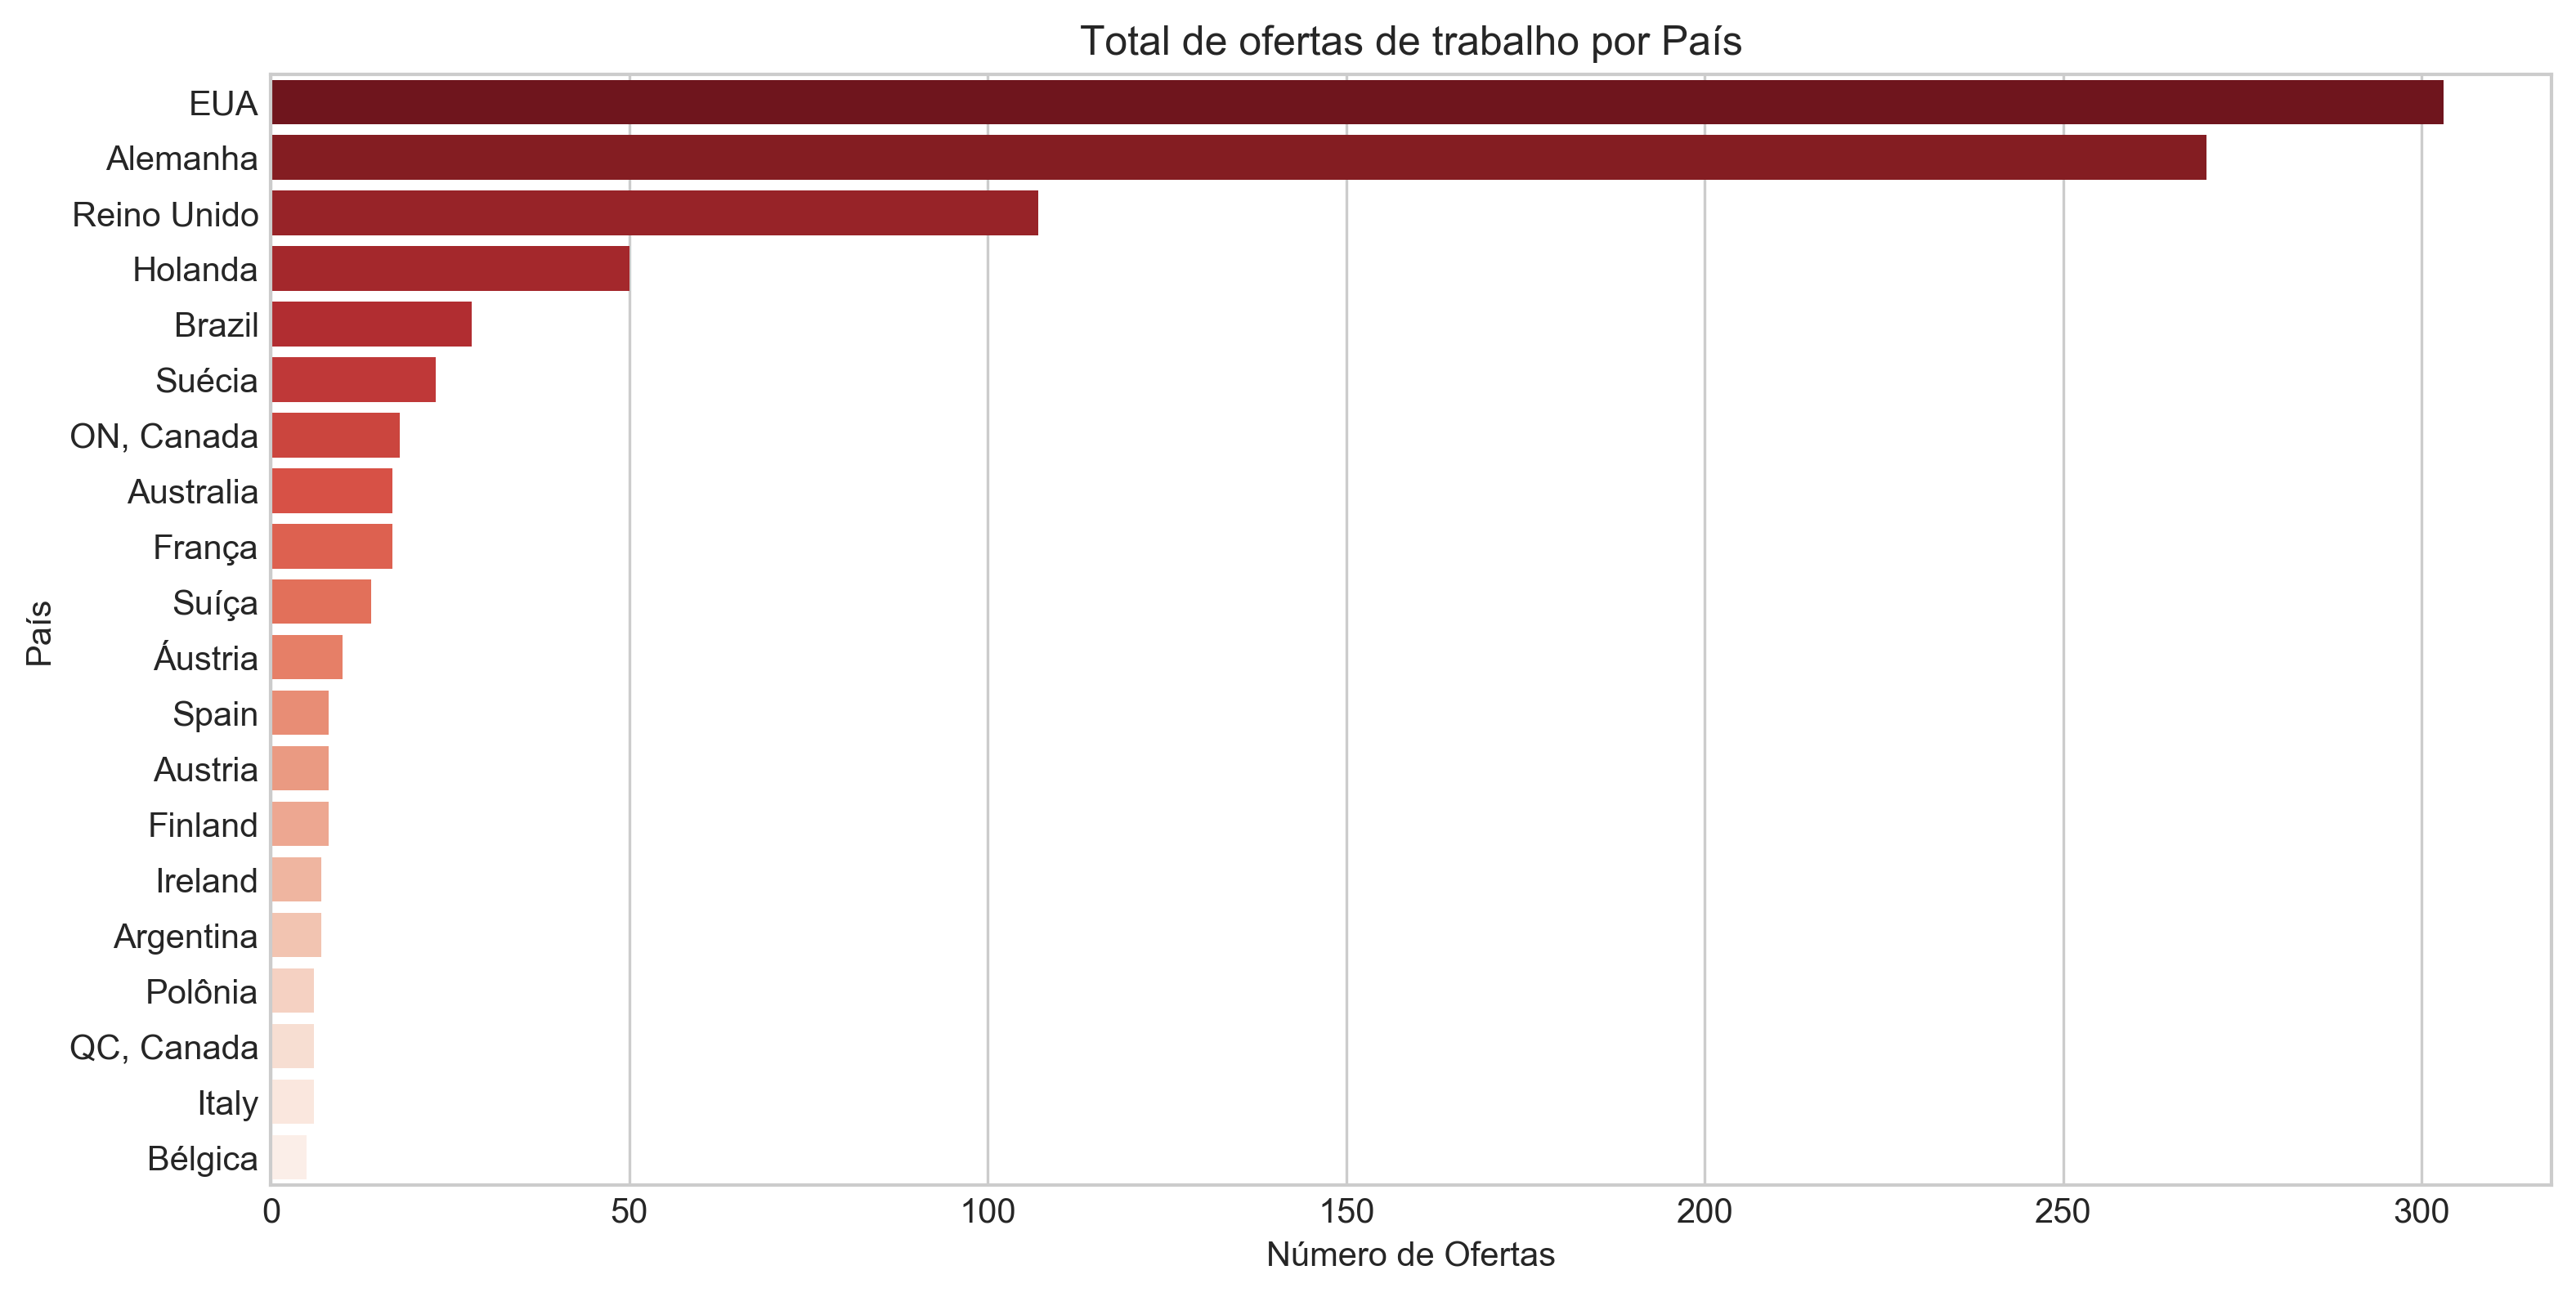

In [5]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 6), dpi=300)
ax = sns.countplot(
    y="country", 
    data=df_unq_eua,  
    order=df_unq_eua['country'].value_counts().iloc[:20].index, 
    palette='Reds_r'
)

ax.set_title('Total de ofertas de trabalho por País')
ax.set_xlabel('Número de Ofertas')
ax.set_ylabel('País')

## Estados com mais ofertas de trabalho
 - Estados dos EUA que possuem a maior oferta de trabalho.

In [6]:
estados_eua = df['country'].map(lambda x: x if 'EUA' in str(x) else None).dropna()

Text(0,0.5,'Estados')

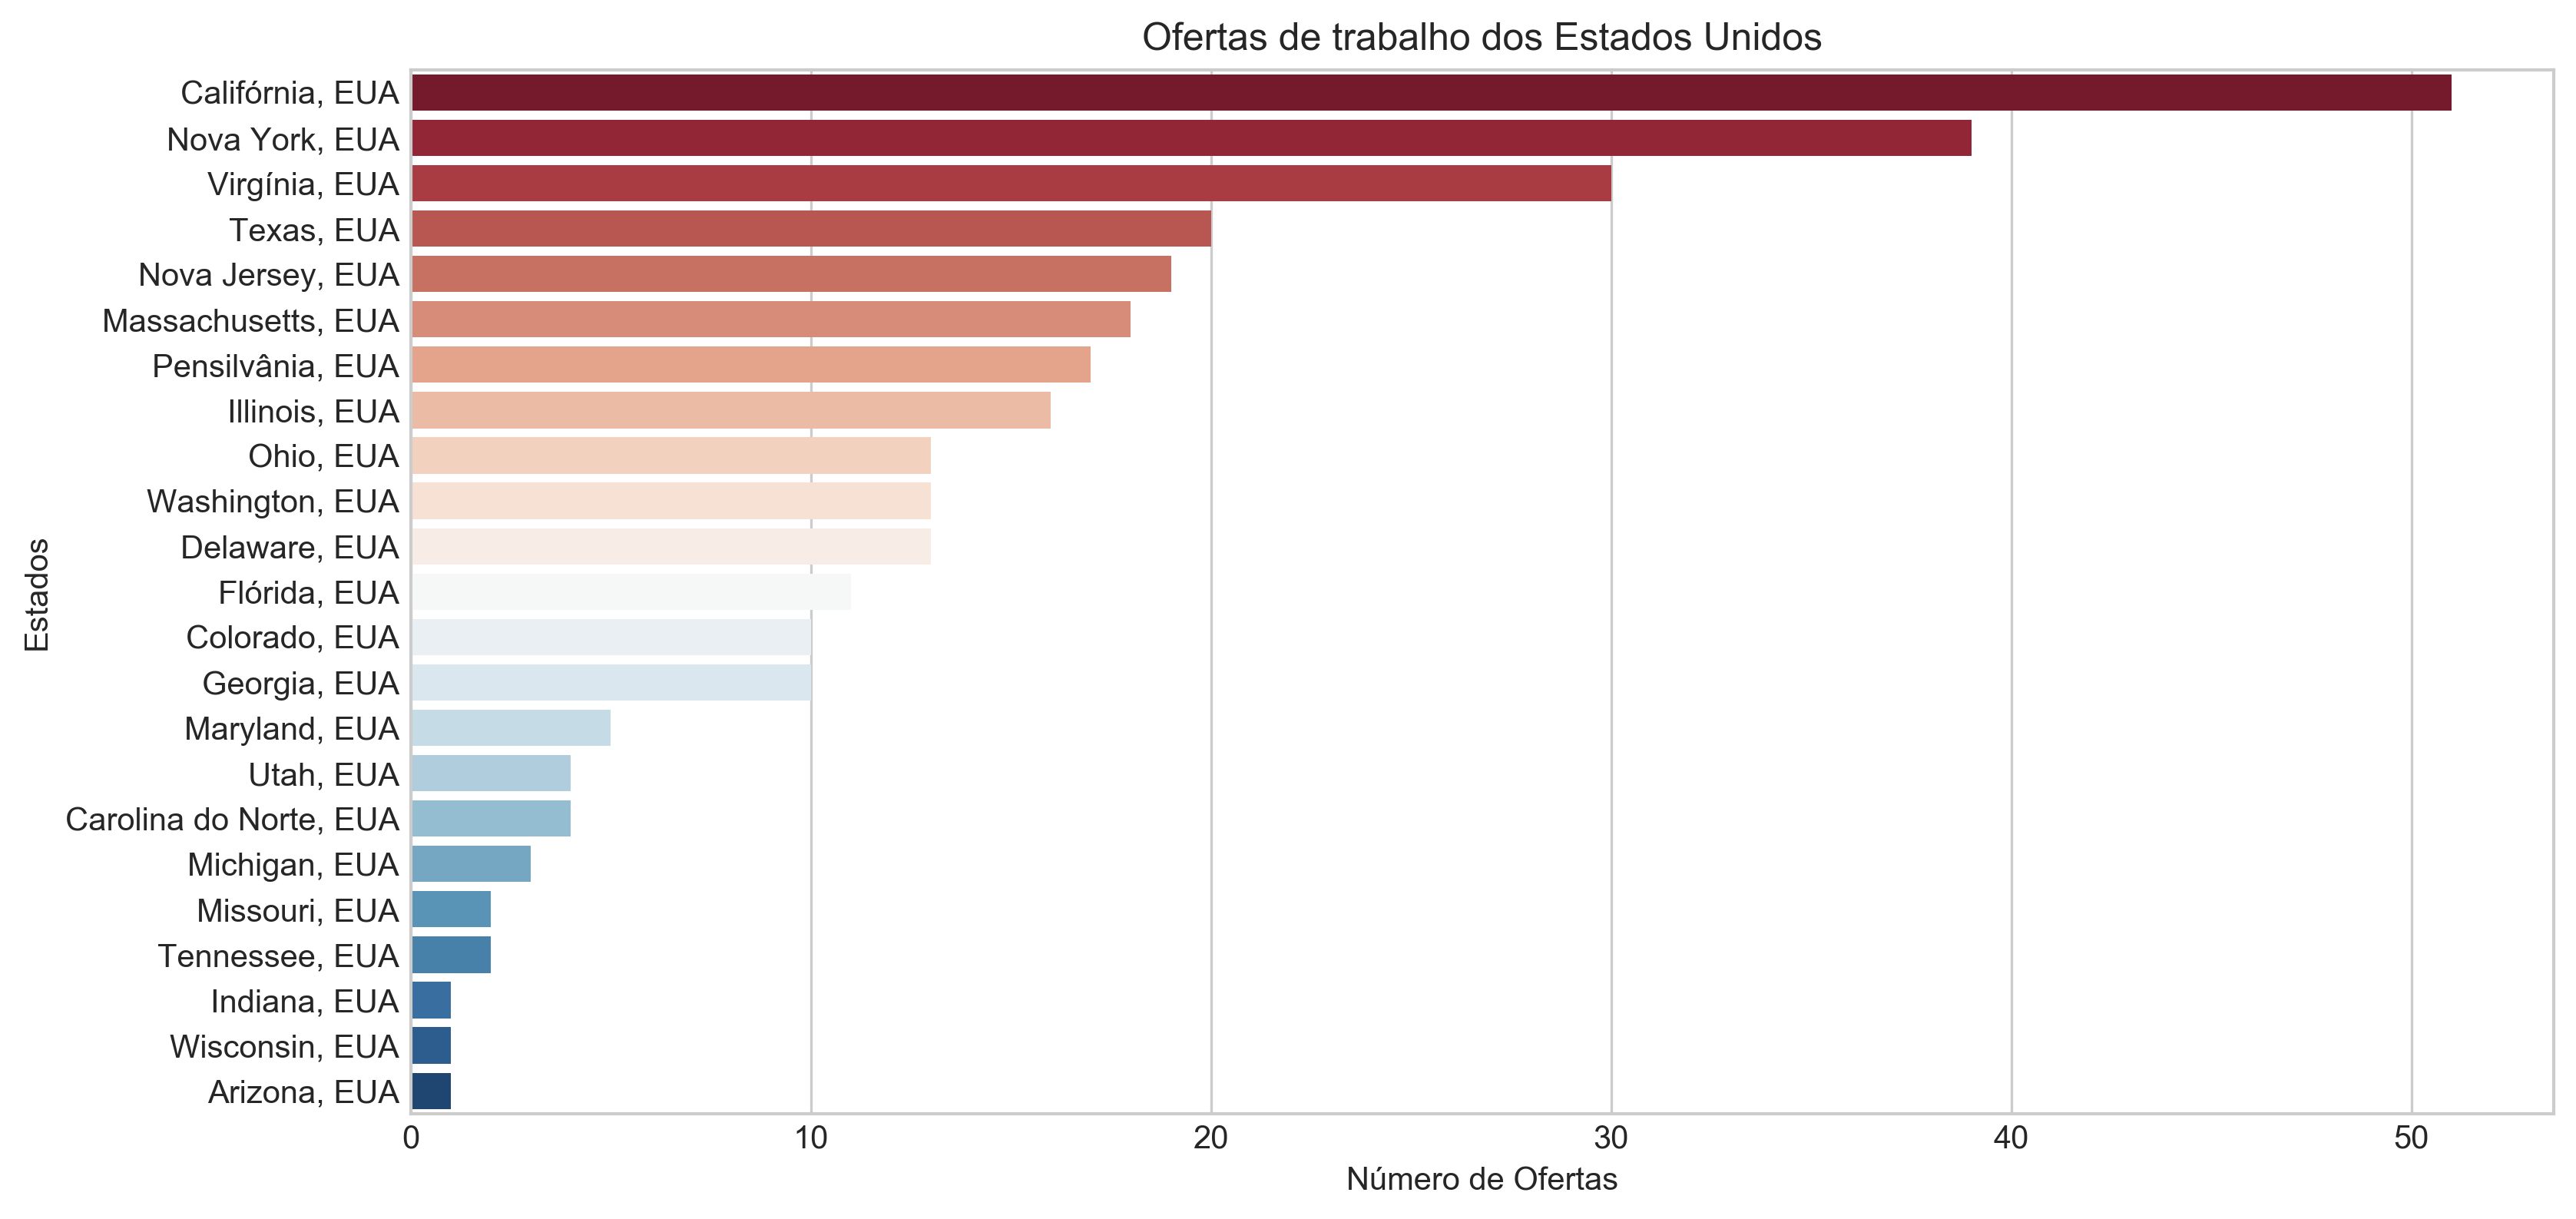

In [7]:
f, ax = plt.subplots(figsize=(12, 6), dpi=300)
sns.countplot(
    y="country", 
    data=df.loc[estados_eua.index], 
    order = df.loc[estados_eua.index]['country'].value_counts().index,
    palette='RdBu'
)

ax.set_title('Ofertas de trabalho dos Estados Unidos')
ax.set_xlabel('Número de Ofertas')
ax.set_ylabel('Estados')

## Regiões do Brasil com mais ofertas de trabalho

Text(0,0.5,'Região')

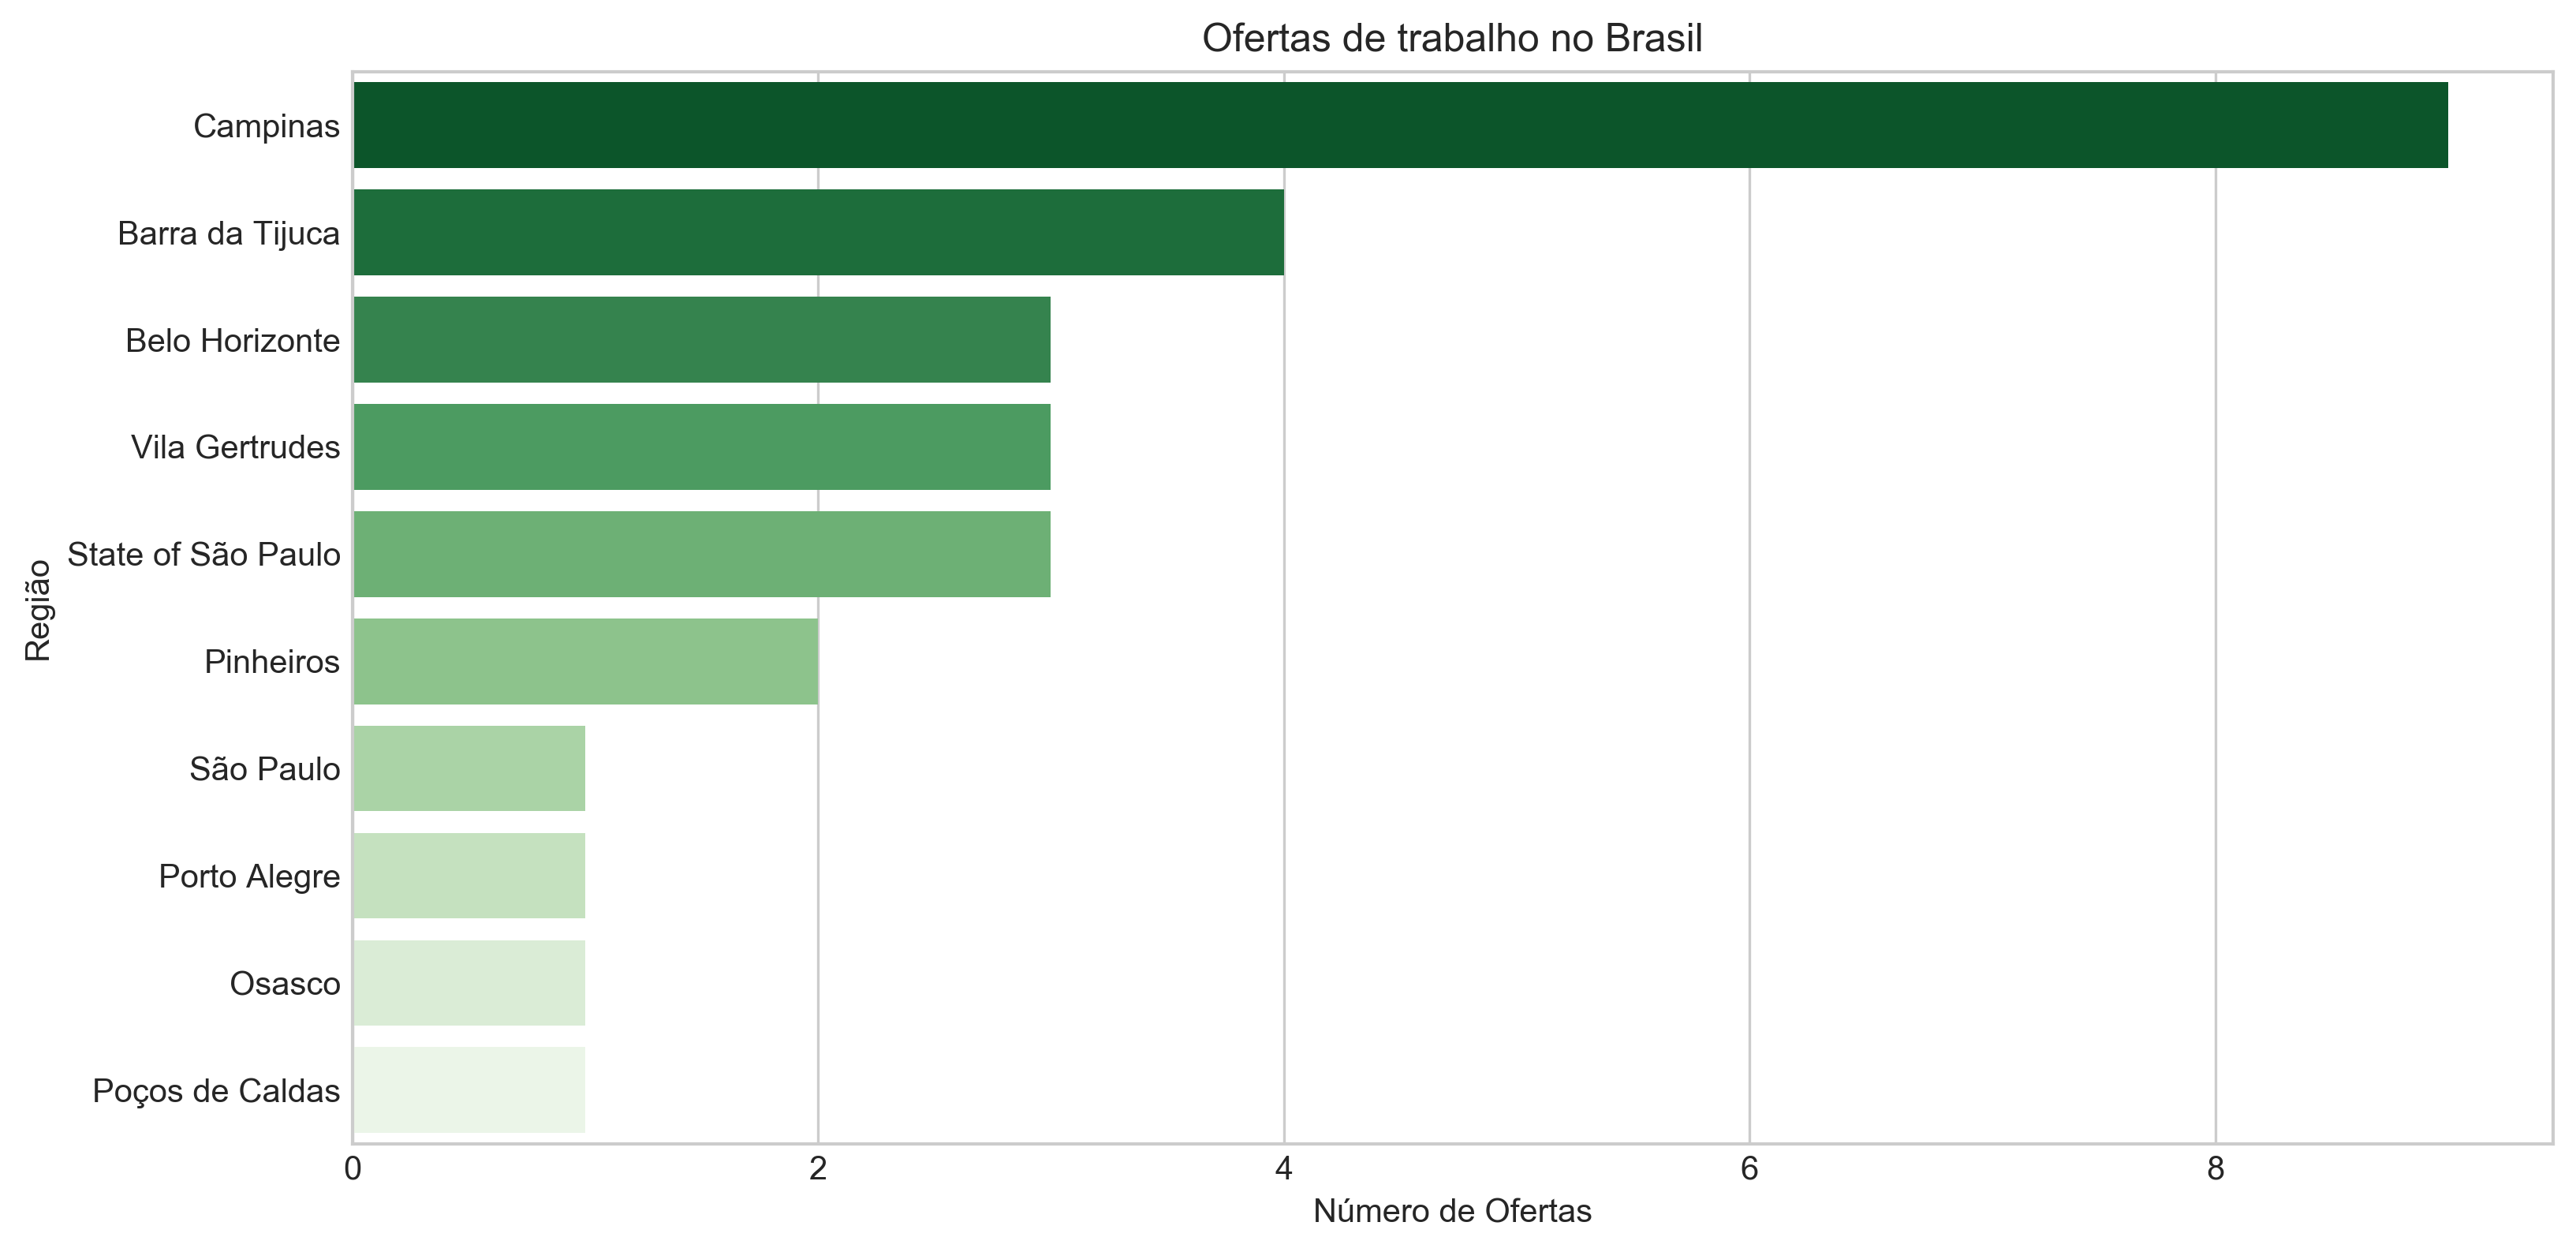

In [8]:
f, ax = plt.subplots(figsize=(12, 6), dpi=300)
sns.countplot(
    y="location", 
    data=df, 
    order = df[df.country == 'Brazil'].location.value_counts().index,
    palette='Greens_r'
)

ax.set_title('Ofertas de trabalho no Brasil')
ax.set_xlabel('Número de Ofertas')
ax.set_ylabel('Região')

## Maiores salários de cada país

Text(0,0.5,'País')

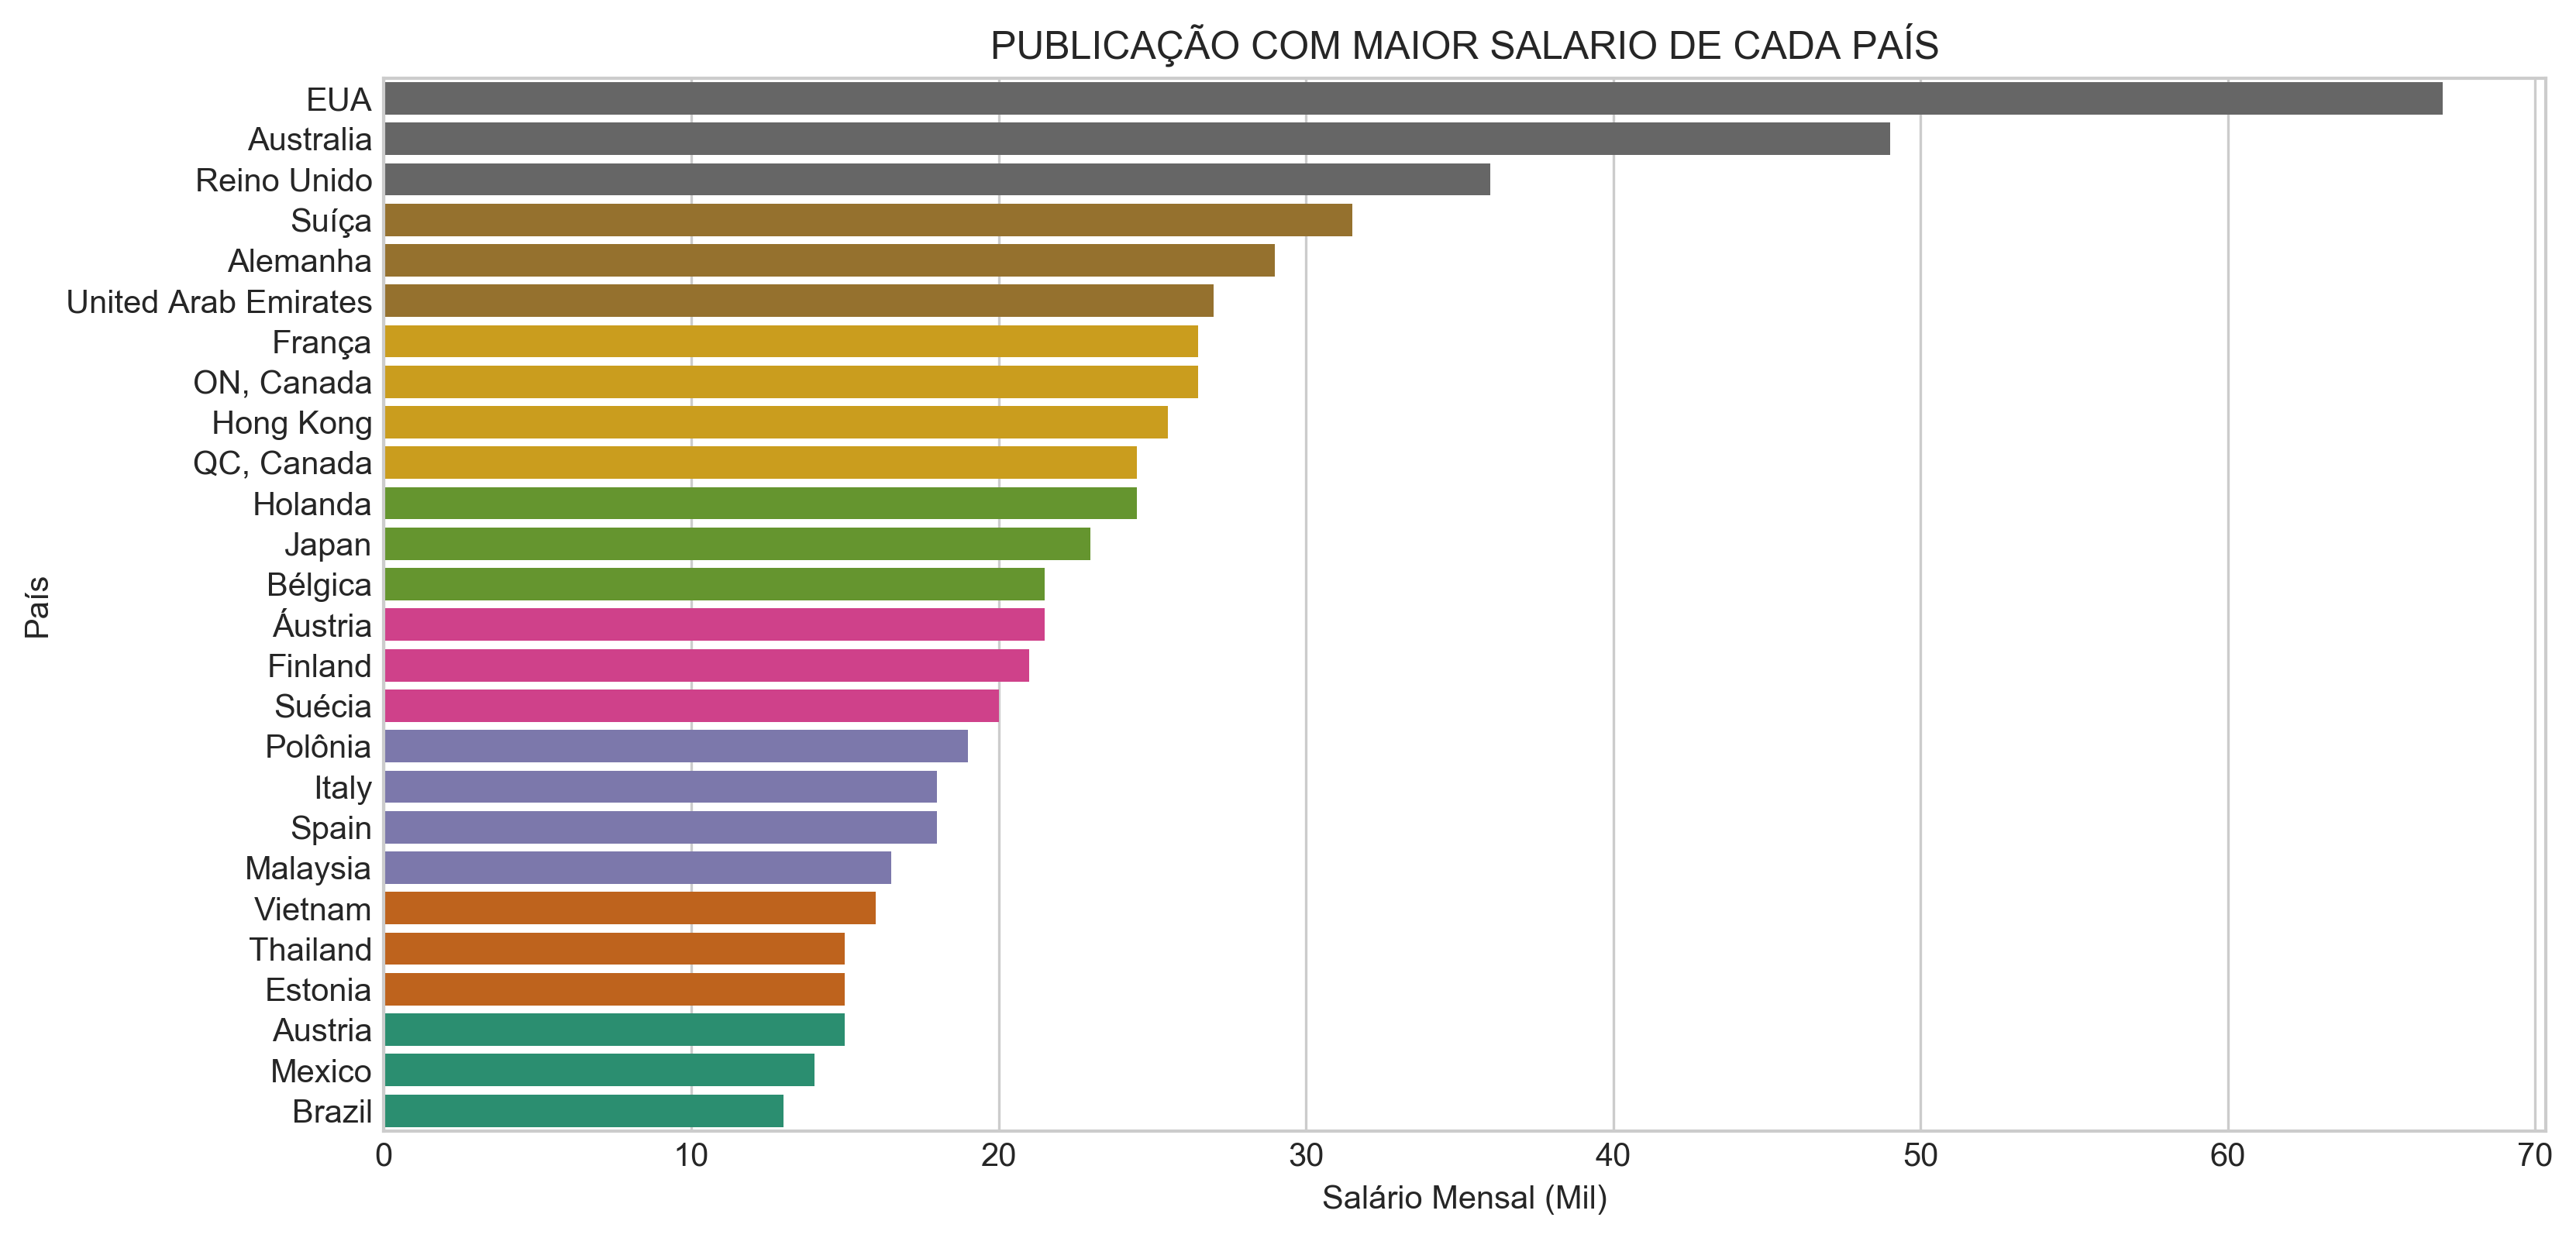

In [9]:
f, ax = plt.subplots(figsize=(12, 6), dpi=300)
sns.barplot(ci=None,
    x='salary_mean', y='country',
    data=df_unq_eua.sort_values('salary_mean', ascending=False).iloc[:253],
    palette="Dark2_r",
    estimator = np.max
)

ax.set_title('PUBLICAÇÃO COM MAIOR SALARIO DE CADA PAÍS')
ax.set_xlabel('Salário Mensal (Mil)')
ax.set_ylabel('País')

### Tags com Maiores Salario 

In [10]:
df_tags = pd.read_csv('jobs_tags.csv')
df_tags.head()

,.net,.net-4.0,.net-core,3-tier,3d,4,ab-testing,abap,accessibility,acoustics,...,workday,workfusion,wpf,wxwidgets,xamarin,xcode,xml,yocto,yui,zend-framework
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002874842BA20>,
      dtype=object)

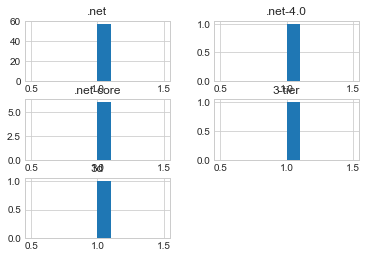

In [11]:
df_tags[df_tags.columns[:5]].hist()

### Tags com maior frequência

Text(0.5,0,'Contagem')

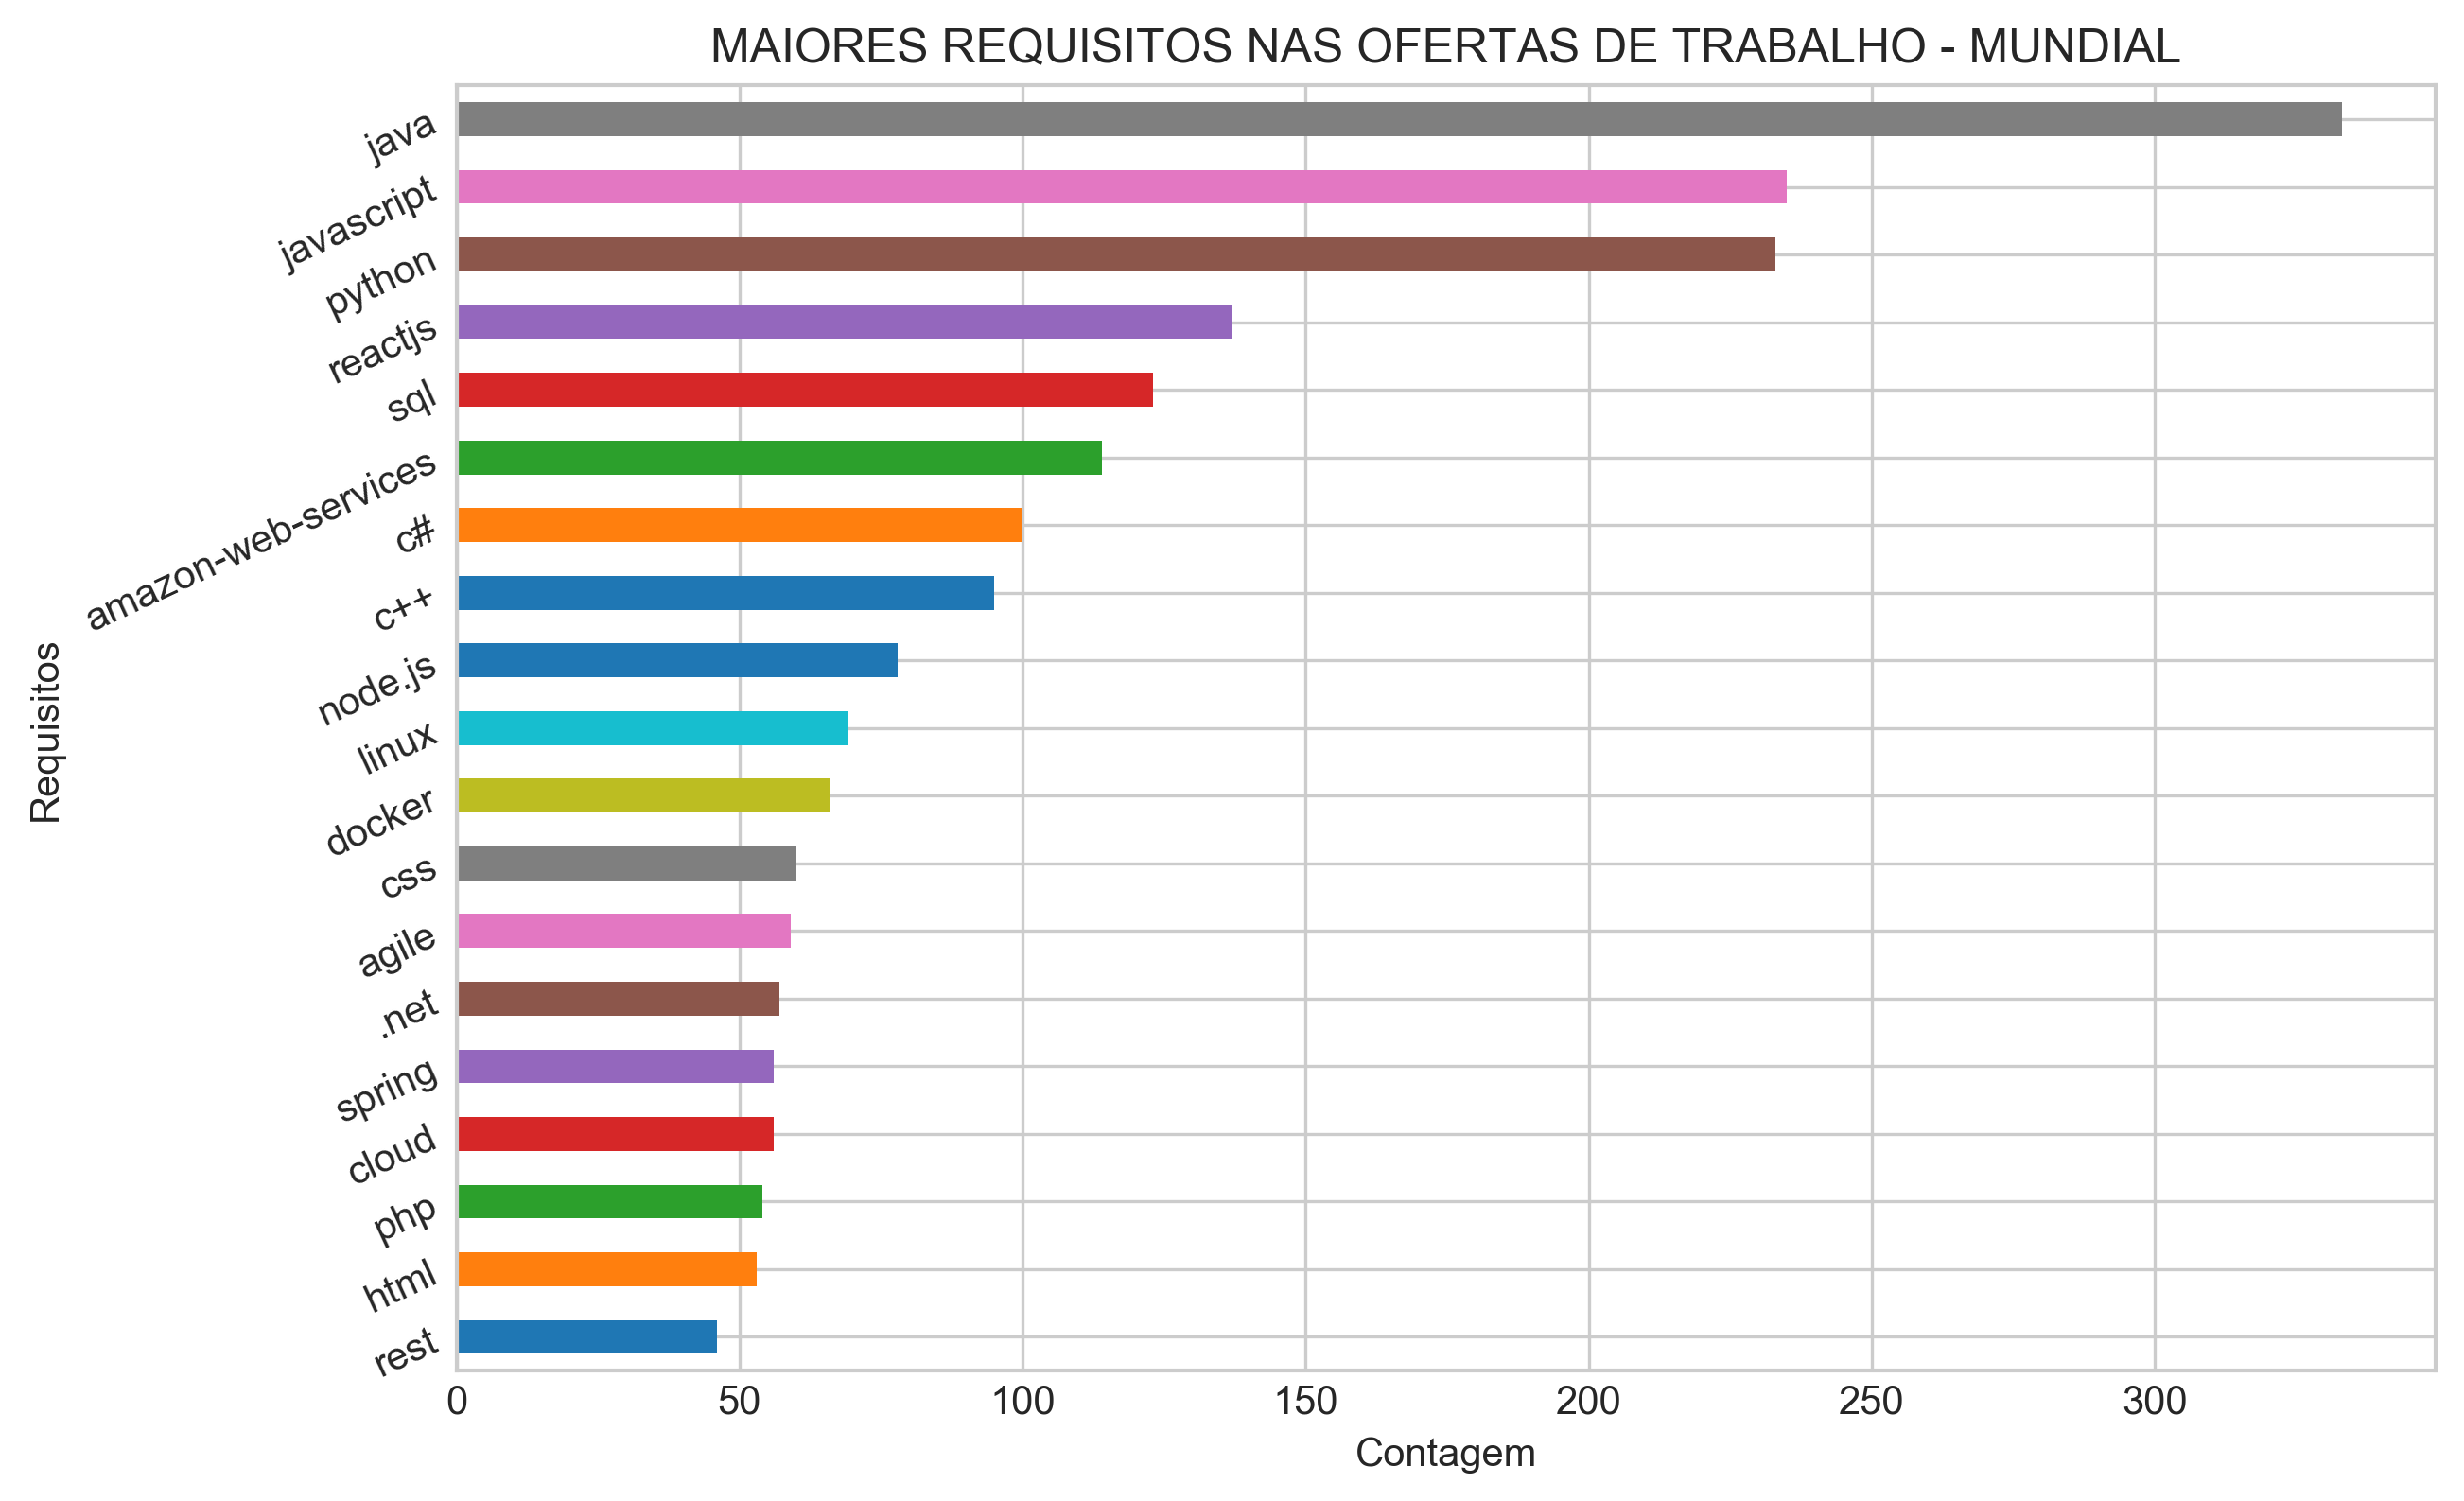

In [12]:
plt.subplots(figsize=(9, 6), dpi=300)
ax = df_tags.count().sort_values()[-20:-1].plot(kind='barh', rot=25)

ax.set_title('MAIORES REQUISITOS NAS OFERTAS DE TRABALHO - MUNDIAL')
ax.set_ylabel('Requisitos')
ax.set_xlabel('Contagem')

### Concatenando os DataFrames

In [13]:
df_job_tags = pd.concat([df, df_tags], axis=1)
df_job_tags.head()

,title,tags,perks,country,location,company,posted,moeda_original,salary_min,salary_max,...,workday,workfusion,wpf,wxwidgets,xamarin,xcode,xml,yocto,yui,zend-framework
0,Technical Program Manager,"scrum, agile",NaN,"ON, Canada",Toronto,Kindred AI,2018-11-15 12:42:44.056522,C$,21,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Platform Engineer,"node.js, amazon-web-services, terraform, docke...",Remote,NaN,NaN,Articulate Inc.,2018-11-15 12:42:44.058503,-,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fullstack Web Developer at Esports Tech Startup,"c#, asp.net, angularjs, javascript, .net",Visa sponsor,Suécia,Stockholm,Challengermode,2018-11-15 12:42:44.059503,SEK,14,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Front to back Developer,"c#, .net, javascript, node.js",NaN,"Nova York, EUA",New York,Compliance Solutions Strategies,2018-11-15 12:42:44.061502,-,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Senior Java Developer,"java, spring, java-ee, rest, springboot",NaN,Alemanha,München,Celonis SE,2018-11-15 12:42:44.063500,-,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Tags com maior frequência no Brasil

Text(0.5,0,'Contagem')

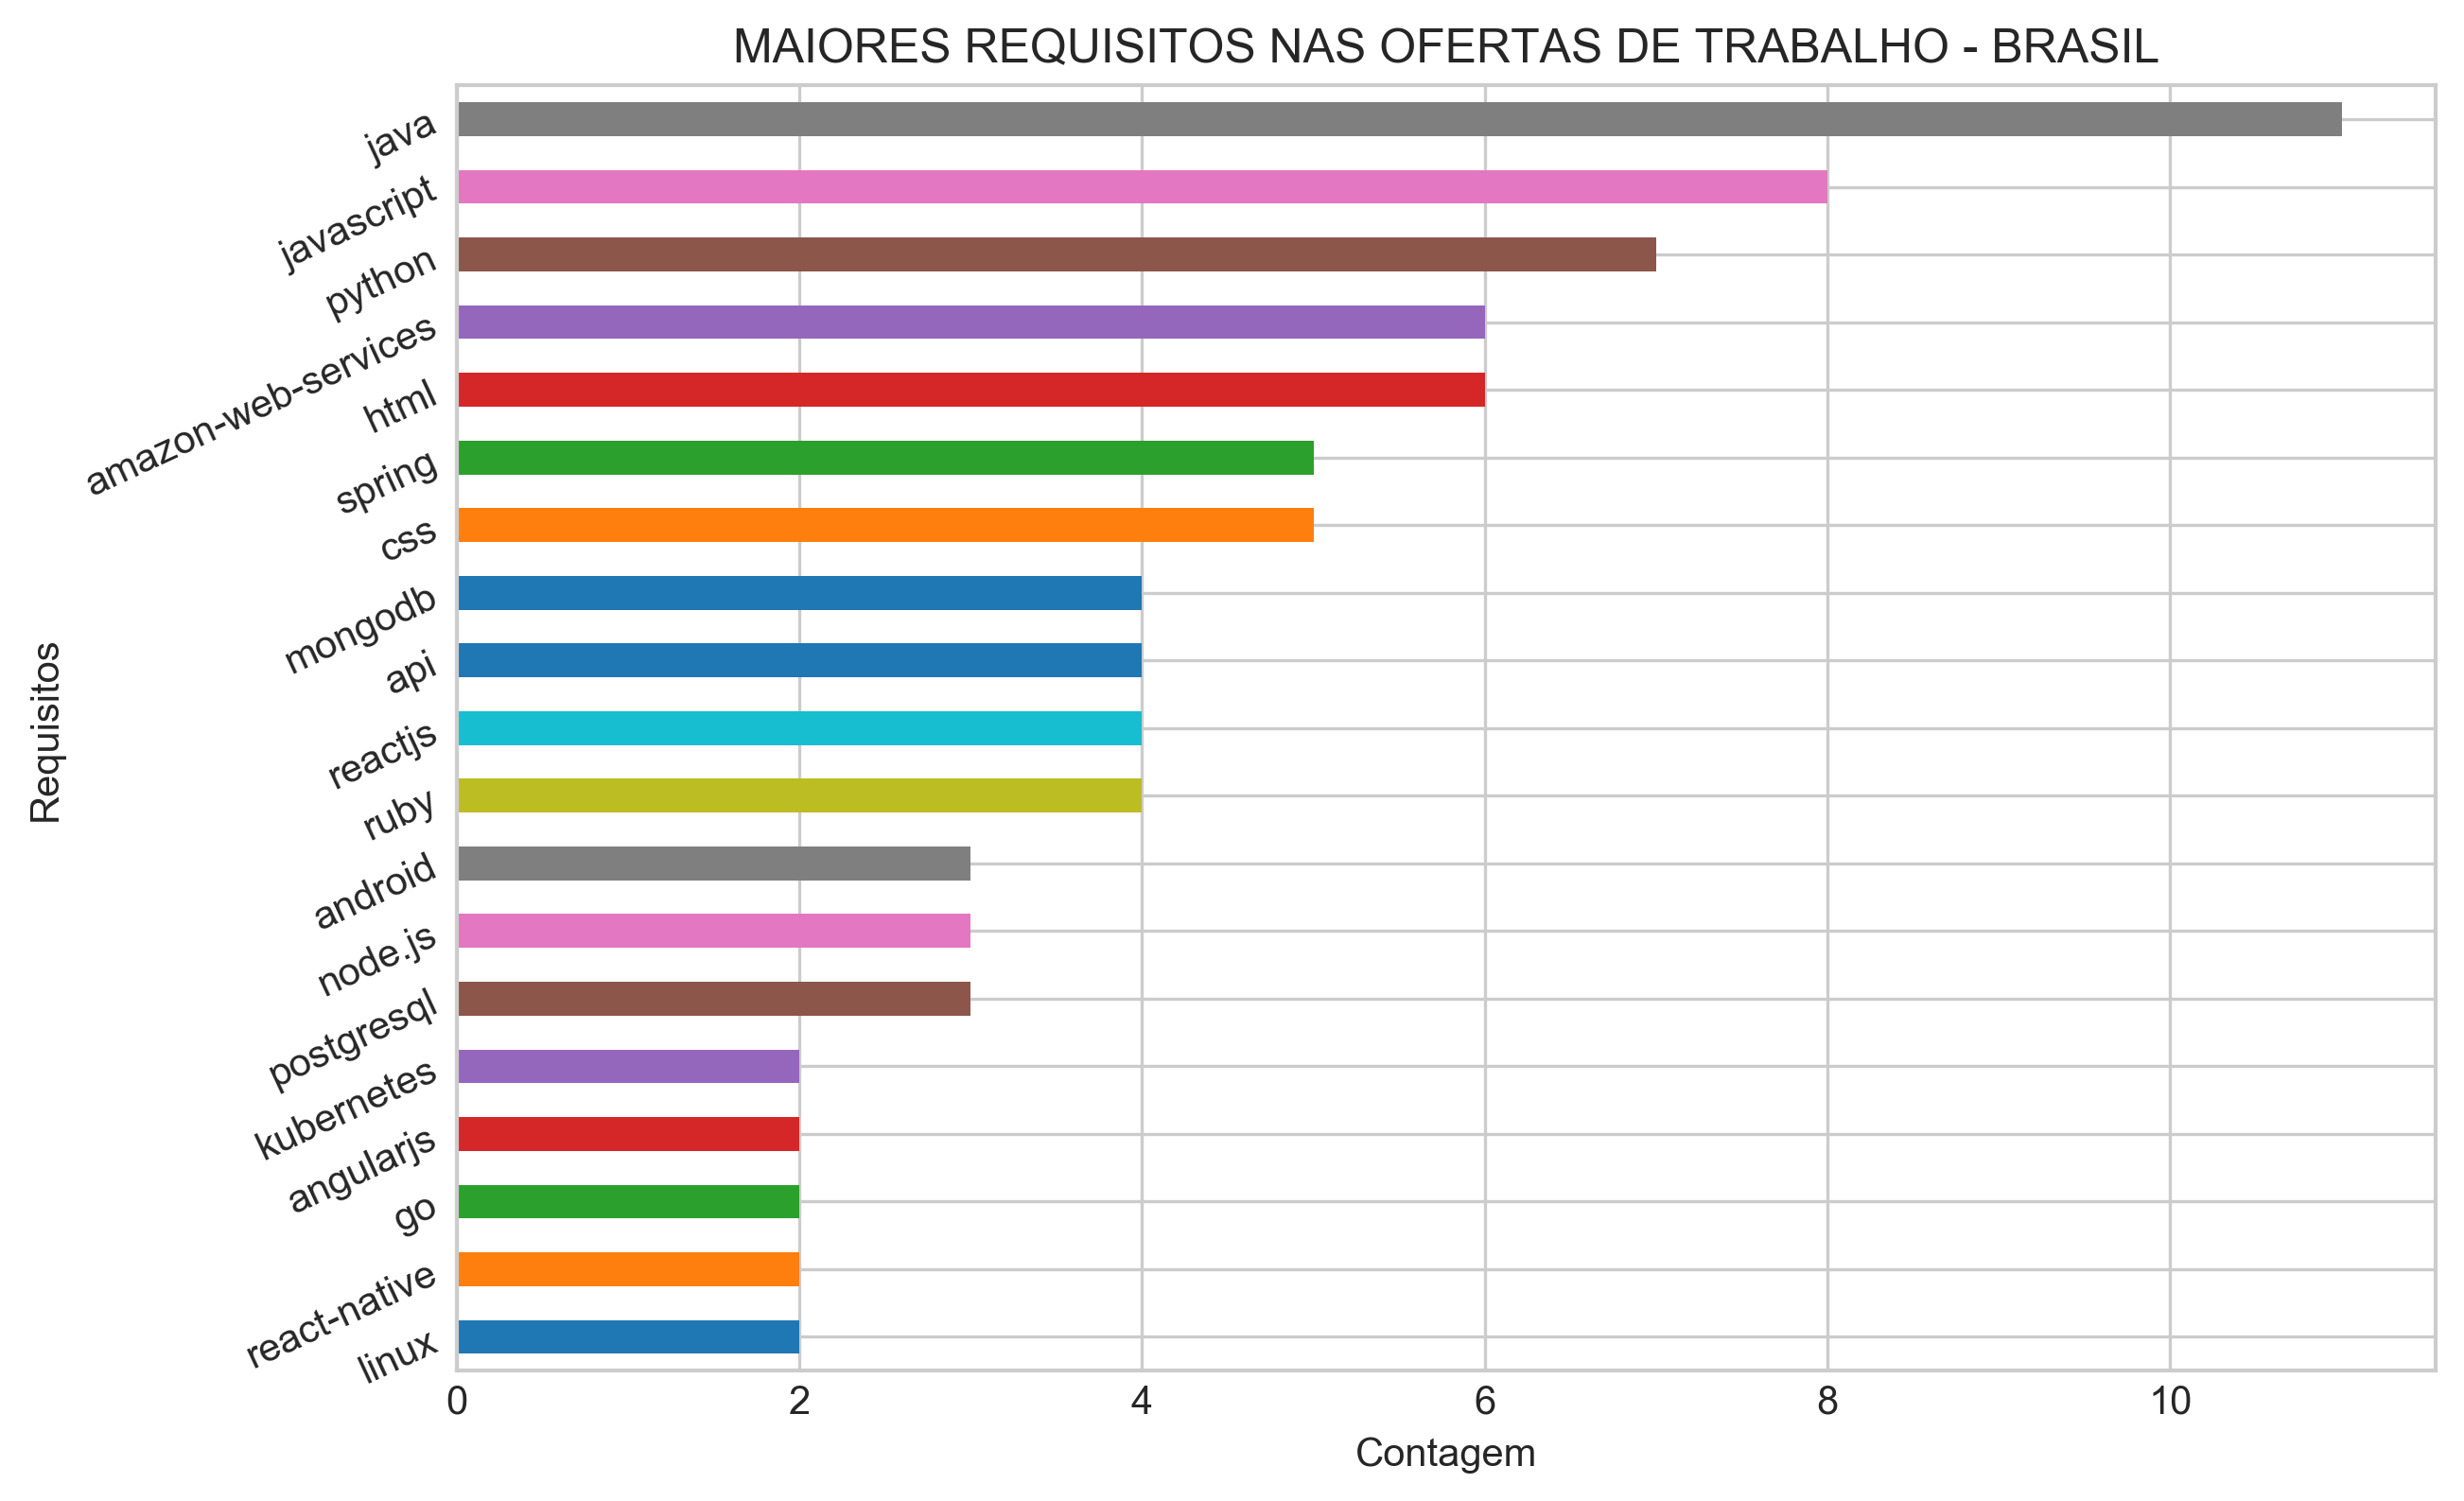

In [14]:
plt.subplots(figsize=(9, 6), dpi=300)
df_brazil = df_job_tags[df.country == 'Brazil']
ax = df_brazil[df_tags.columns].count().sort_values()[-20:-1].plot(kind='barh', rot=25)

ax.set_title('MAIORES REQUISITOS NAS OFERTAS DE TRABALHO - BRASIL')
ax.set_ylabel('Requisitos')
ax.set_xlabel('Contagem')

### Distribuição do salário das 10 tags mais usadas.

In [38]:
# cria um DataFrame associando cada salario a tag correspondente.
df_salario_tag = pd.DataFrame()

for tag in df_tags.columns[1:]:
    df_teste = pd.DataFrame(
                    df_job_tags[df_job_tags[tag] == 1]['salary_mean']  
                ).fillna(0)
    
    df_teste['tag'] = tag
    df_salario_tag = df_salario_tag.append(df_teste, ignore_index=True)
    
df_salario_tag['id'] = list(df_salario_tag.index)
df_salario_tag['tag_cod'] = LabelEncoder().fit_transform(df_salario_tag['tag'])
df_salario_tag.head()

,salary_mean,tag,id,tag_cod
0,0.0,.net-4.0,0,0
1,0.0,.net-core,1,1
2,0.0,.net-core,2,1
3,21.5,.net-core,3,1
4,0.0,.net-core,4,1


In [54]:
# obtém as linhas com as 10 tags mais usadas
tags_plotar = df_salario_tag.tag_cod.value_counts()[:10].index
tags_plotar = df_salario_tag['tag_cod'].map(lambda x: x if x in tags_plotar else None).dropna()

C:\Users\guilh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


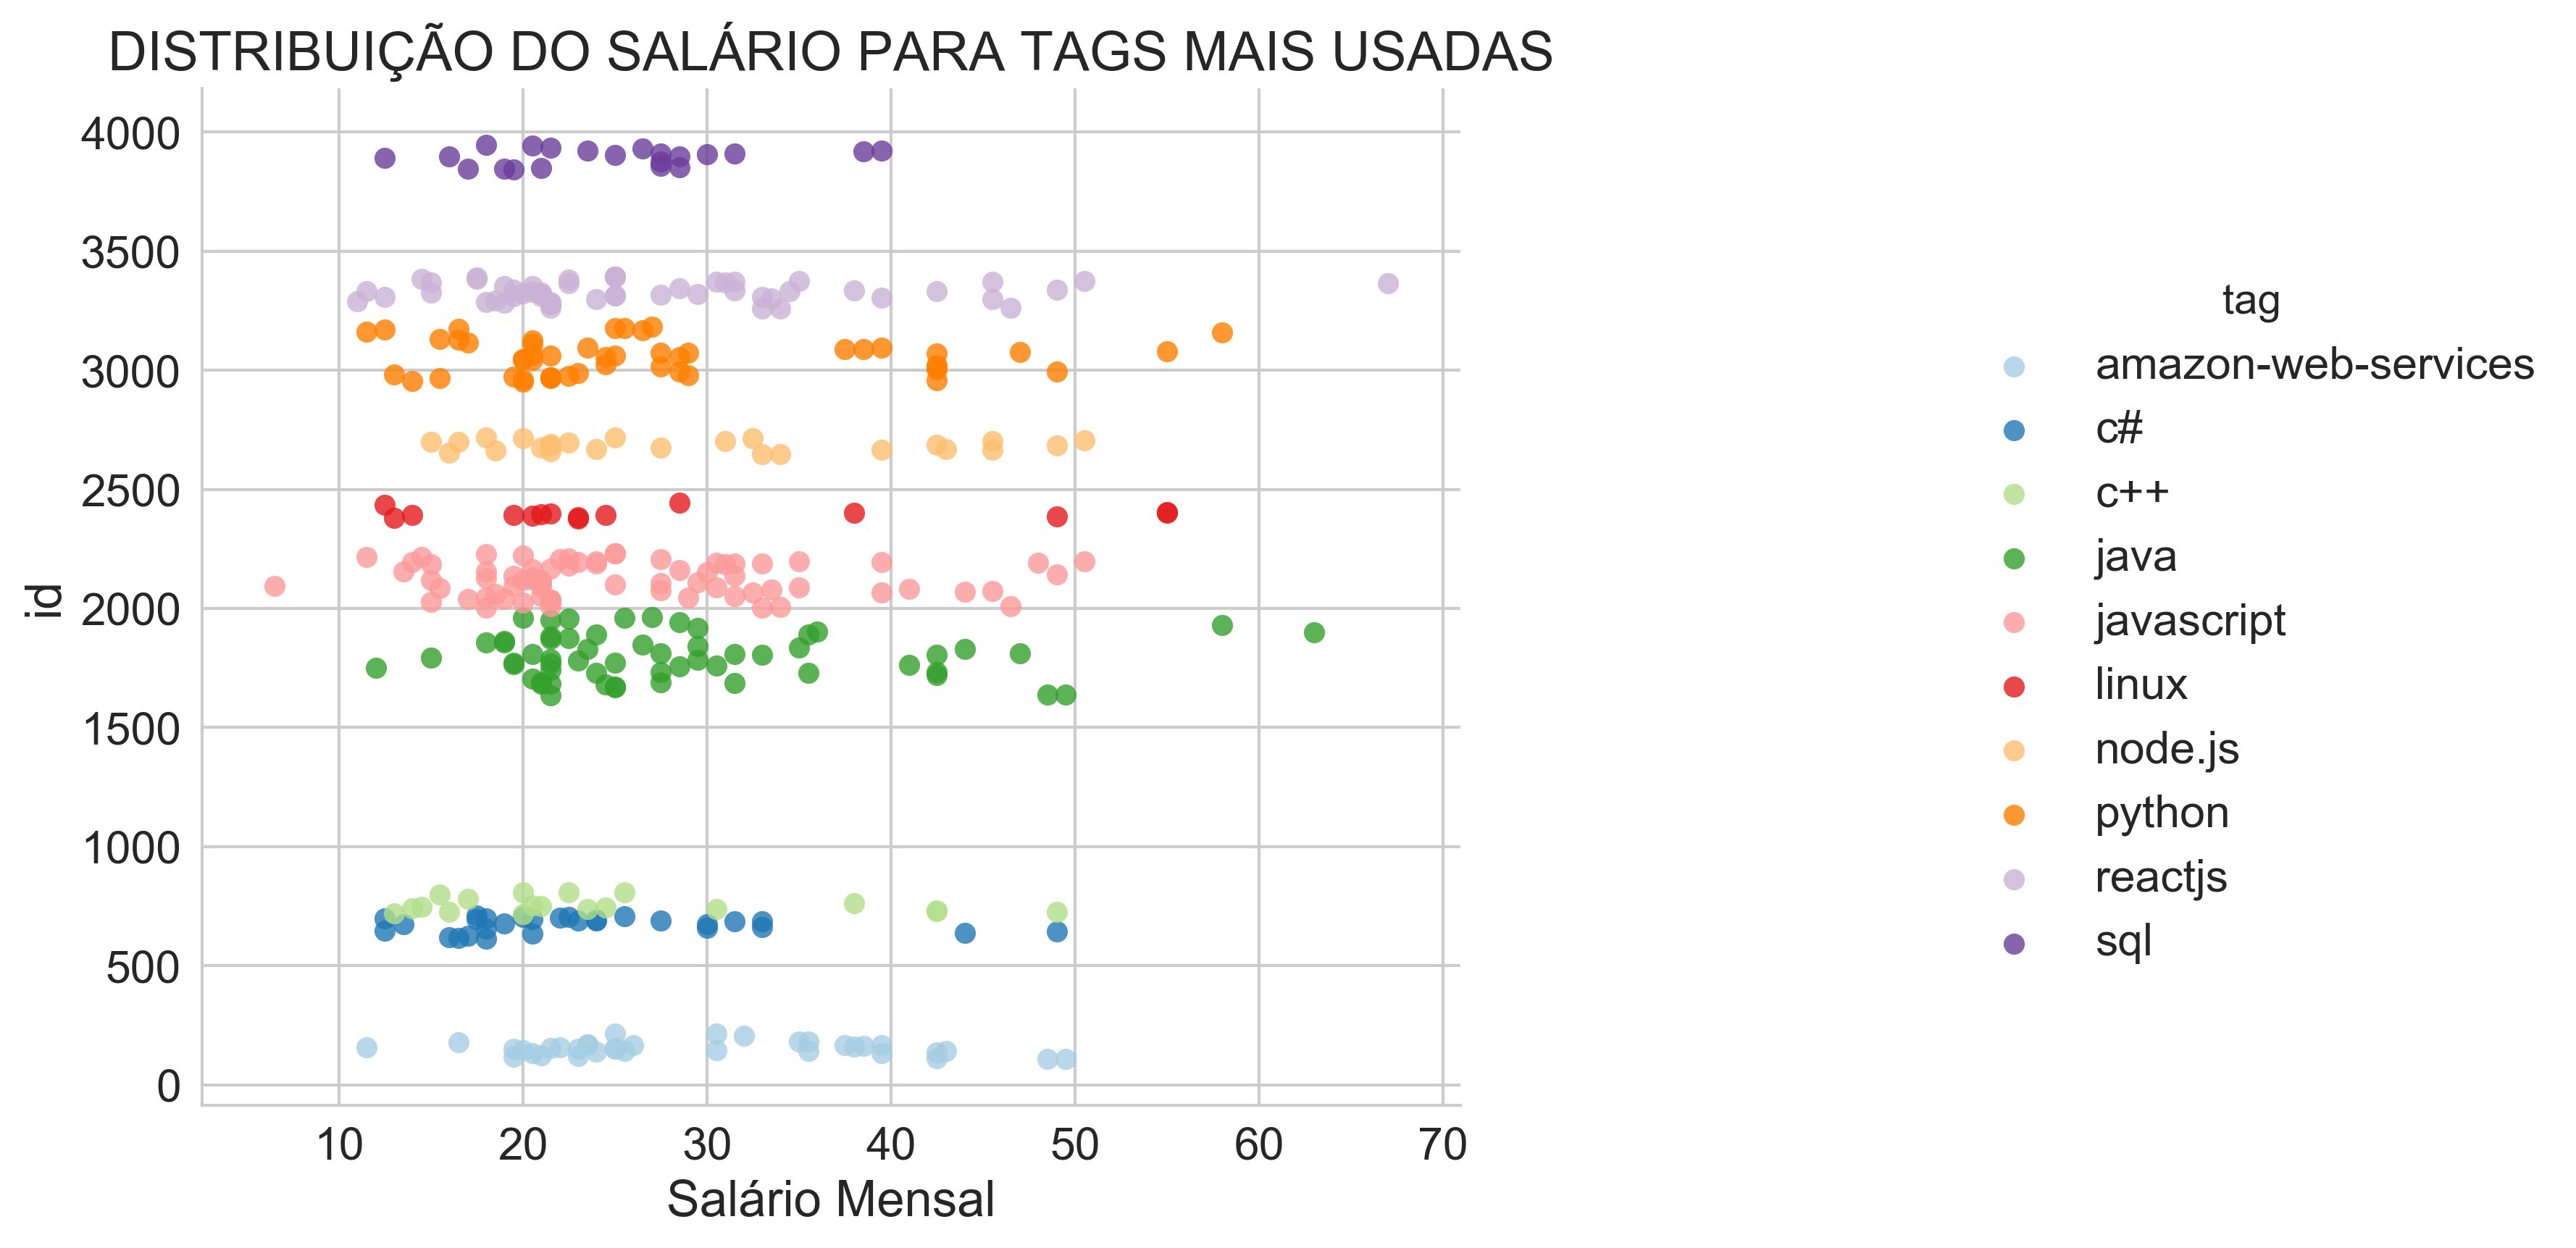

In [67]:
sns.set(font_scale=1.5, style="whitegrid")
g = sns.lmplot(
    x="salary_mean",
    y='id',
    hue="tag",
    data=df_salario_tag.loc[tags_plotar.index][df_salario_tag.salary_mean > 1],
    fit_reg=False,
    palette='Paired'
)

g.fig.set_size_inches(14, 6)
g.fig.dpi = 300
g.ax.set_title('DISTRIBUIÇÃO DO SALÁRIO PARA TAGS MAIS USADAS')
g.set_xlabels('Salário Mensal')

In [81]:
df_unq_eua[df_unq_eua.salary_mean > 48].sort_values('salary_mean', ascending=False)[['title', 'tags', 'country', 'location', 'salary_mean']]

,title,tags,country,location,salary_mean
752,Senior Golang Software Engineer,"golang, c, reactjs, security, performance",EUA,Scottsdale,67.0
811,Sr. GO Engineer,"go, java, scala",EUA,New York,63.0
903,Staff Software Engineer - Data Platform,"python, java, microservices, spark, aws",EUA,San Francisco,58.0
24,Software Engineer (Android / iOS),"ios, android, mobile, multithreading, push-not...",EUA,New York,56.5
26,Software Engineer (Backend),"go, ruby, ruby-on-rails, redis, postgresql",EUA,New York,56.5
542,Systems Administrator (SysAdmin),"linux, centos, rhel, vmware, ansible, sysadmin",EUA,McLean,55.0
544,Mobile Application Developer,"android, phonegap, xcode, cocoa, eclipse",EUA,McLean,55.0
548,Systems Engineer,"ansible, linux, python, bash",EUA,McLean,55.0
818,Sr. Software Engineer - Full Stack,"javascript, node.js, reactjs, html, microservices",EUA,Emeryville,50.5
17,Big Data Engineer,"scala, java, amazon-web-services, bigdata",EUA,Washington,49.5
